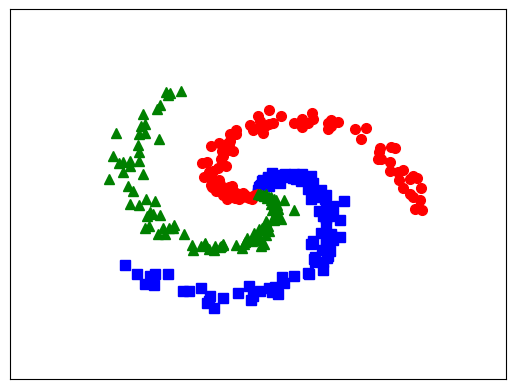

In [51]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [52]:

# Using softmax classifier
def softmax(Z):
    a = np.exp(Z - np.max(Z,axis=0, keepdims=True))
    aZ = a / a.sum(axis=0)
    return aZ


# One-hot labels
from scipy import sparse
def convert_labels(y, C=3):
    y_converted_labels = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    
    return y_converted_labels

# Lossfunction Crosse Entropy
def loss_func(y, ypredict):

    return -np.sum(y * np.log(ypredict)) / y.shape[1]

In [53]:
dimensions = 2
units_hidden_layer = 100
number_of_classes = 3
losses = []
lr = 1
# Initialize parameters randomly

weights1 = 0.01 * np.random.randn(dimensions, units_hidden_layer)
bias1 = np.zeros((units_hidden_layer, 1))
weights2 = 0.01 * np.random.randn(units_hidden_layer, number_of_classes)
bias2 = np.zeros((number_of_classes, 1))

y_converted_labels = convert_labels(y, C=3)

N = X.shape[1]

for epoch in range(10000):
    

    Z1 = np.dot(weights1.T, X) + bias1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(weights2.T, A1) + bias2
    ypredict = softmax(Z2)
    

    # compute loss

    loss = loss_func(y_converted_labels, ypredict)
    
    losses.append(loss)

    # Backward

    E2 = (ypredict - y_converted_labels) / N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis=1, keepdims=True)
    E1 = np.dot(weights2, E2)
    E1[Z1 <= 0] = 0
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis=1, keepdims=True)

    # Update weights
    weights1 -= lr * dW1
    bias1 -= lr * db1
    weights2 -= lr * dW2
    bias2 -= lr * db2





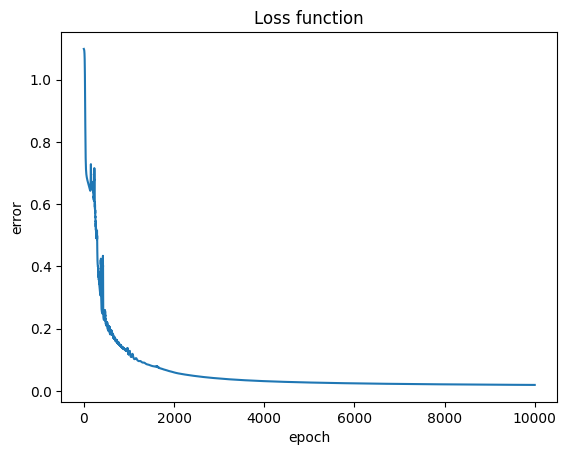

In [56]:
plt.title('Loss function')
plt.ylabel('error')
plt.xlabel('epoch')
plt.plot(losses)


In [55]:
Z1 = np.dot(weights1.T, X) + bias1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(weights2.T, A1) + bias2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.33 %
